In [1]:
library(caret)
library(tidyverse)
library(magrittr)

Loading required package: lattice
Loading required package: ggplot2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1       ✔ purrr   0.3.0  
✔ tidyr   0.8.2       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.0.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
#The German Credit Dataset - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
#Input data
pathgerman  <- ("https://raw.githubusercontent.com/longtng/frauddetectionproject/master/german_credit.csv")
german <- read.csv(pathgerman,header = T)

In [3]:
german %>% str()

'data.frame':	1000 obs. of  62 variables:
 $ Duration                              : int  6 48 12 42 24 36 24 36 12 30 ...
 $ Amount                                : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ InstallmentRatePercentage             : int  4 2 2 2 3 2 3 2 2 4 ...
 $ ResidenceDuration                     : int  4 2 3 4 4 4 4 2 4 2 ...
 $ Age                                   : int  67 22 49 45 53 35 53 35 61 28 ...
 $ NumberExistingCredits                 : int  2 1 1 1 2 1 1 1 1 2 ...
 $ NumberPeopleMaintenance               : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Telephone                             : int  0 1 1 1 1 0 1 0 1 1 ...
 $ ForeignWorker                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Class                                 : Factor w/ 2 levels "Bad","Good": 2 1 2 2 1 2 2 2 2 1 ...
 $ CheckingAccountStatus.lt.0            : int  1 0 0 1 1 0 0 0 0 0 ...
 $ CheckingAccountStatus.0.to.200        : int  0 1 0 0 0 0 0 1 0 1 ...
 $ CheckingAccoun

In [4]:
# Checking missing value for each column function
naratio <- function(x) {100*sum(is.na(x)) / length(x)}

In [5]:
# Check on missing value
options(warn = -1) 
german %>% summarise_all(funs(naratio))

Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,⋯,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
# split dataset into 80/20 
set.seed(29)
id <- createDataPartition(y = german$Class, p = 0.8, list = FALSE)

train_data <- german[id, ]
test_data <- german[-id, ]

In [7]:
head(train_data,5)

Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,⋯,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
6,1169,4,4,67,2,1,0,1,Good,⋯,0,0,1,0,1,0,0,0,1,0
48,5951,2,2,22,1,1,1,1,Bad,⋯,0,0,1,0,1,0,0,0,1,0
12,2096,2,3,49,1,2,1,1,Good,⋯,0,0,1,0,1,0,0,1,0,0
42,7882,2,4,45,1,2,1,1,Good,⋯,0,0,1,0,0,1,0,0,1,0
24,4870,3,4,53,2,2,1,1,Bad,⋯,0,0,1,0,0,1,0,0,1,0


In [8]:
#------------------------
#   XGboost
#------------------------
# cross - validation condition setup
ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 6, summaryFunction = multiClassSummary)

In [9]:
#----------------
#   XGBoost
#----------------
set.seed(29)
model_xgb_null2 <- train(Class ~ ., data = train_data, method = "xgbTree", preProcess = NULL, trControl = ctrl)

In [10]:
# output: 
pred1 <- predict(model_xgb_null2, test_data)
confusionMatrix(pred1, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   28   18
      Good  32  122
                                         
               Accuracy : 0.75           
                 95% CI : (0.684, 0.8084)
    No Information Rate : 0.7            
    P-Value [Acc > NIR] : 0.06955        
                                         
                  Kappa : 0.3622         
 Mcnemar's Test P-Value : 0.06599        
                                         
            Sensitivity : 0.4667         
            Specificity : 0.8714         
         Pos Pred Value : 0.6087         
         Neg Pred Value : 0.7922         
             Prevalence : 0.3000         
         Detection Rate : 0.1400         
   Detection Prevalence : 0.2300         
      Balanced Accuracy : 0.6690         
                                         
       'Positive' Class : Bad            
                                         

In [11]:
#------------------
#   Logistic
#------------------
options(warn=-1)
model_logit_null2 <- train(Class ~ ., data = train_data, method = "glm", 
                           family = "binomial", preProcess = NULL, trControl = ctrl)

In [12]:
# output of Logistic: 
options(warn=-1)
pred2 <- predict(model_logit_null2, test_data)
confusionMatrix(pred2, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   32   19
      Good  28  121
                                       
               Accuracy : 0.765        
                 95% CI : (0.7, 0.8219)
    No Information Rate : 0.7          
    P-Value [Acc > NIR] : 0.02493      
                                       
                  Kappa : 0.4154       
 Mcnemar's Test P-Value : 0.24324      
                                       
            Sensitivity : 0.5333       
            Specificity : 0.8643       
         Pos Pred Value : 0.6275       
         Neg Pred Value : 0.8121       
             Prevalence : 0.3000       
         Detection Rate : 0.1600       
   Detection Prevalence : 0.2550       
      Balanced Accuracy : 0.6988       
                                       
       'Positive' Class : Bad          
                                       

In [13]:
#------------------
#   KNN
#------------------
options(warn=-1)
model_KNN_null2 <- train(Class ~ ., data = train_data, method = "knn", preProcess = NULL, trControl = ctrl)

In [14]:
# output of KNN: 
options(warn=-1)
predKNN <- predict(model_KNN_null2, test_data)
confusionMatrix(predKNN, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   11   15
      Good  49  125
                                         
               Accuracy : 0.68           
                 95% CI : (0.6105, 0.744)
    No Information Rate : 0.7            
    P-Value [Acc > NIR] : 0.7579         
                                         
                  Kappa : 0.0909         
 Mcnemar's Test P-Value : 3.707e-05      
                                         
            Sensitivity : 0.1833         
            Specificity : 0.8929         
         Pos Pred Value : 0.4231         
         Neg Pred Value : 0.7184         
             Prevalence : 0.3000         
         Detection Rate : 0.0550         
   Detection Prevalence : 0.1300         
      Balanced Accuracy : 0.5381         
                                         
       'Positive' Class : Bad            
                                         

In [15]:
#------------------
#   Random Forest
#------------------
options(warn=-1)
model_RF_null2 <- train(Class ~ ., data = train_data, method = "rf", preProcess = NULL, trControl = ctrl)

In [16]:
# output of Random Forest: 
options(warn=-1)
predRF <- predict(model_RF_null2, test_data)
confusionMatrix(predRF, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   30   15
      Good  30  125
                                          
               Accuracy : 0.775           
                 95% CI : (0.7108, 0.8309)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.01113         
                                          
                  Kappa : 0.4231          
 Mcnemar's Test P-Value : 0.03689         
                                          
            Sensitivity : 0.5000          
            Specificity : 0.8929          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.8065          
             Prevalence : 0.3000          
         Detection Rate : 0.1500          
   Detection Prevalence : 0.2250          
      Balanced Accuracy : 0.6964          
                                          
       'Positive' Class : Bad             
                                          

In [17]:
#------------------
#   Support Vector Machine
#------------------
options(warn=-1)
model_SVM_null2 <- train(Class ~ ., data = train_data, method = "svmLinear", preProcess = NULL, trControl = ctrl)

In [18]:
# output of SVM: 
options(warn=-1)
predSVM <- predict(model_SVM_null2, test_data)
confusionMatrix(predSVM, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   16    7
      Good  44  133
                                          
               Accuracy : 0.745           
                 95% CI : (0.6787, 0.8039)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.09344         
                                          
                  Kappa : 0.263           
 Mcnemar's Test P-Value : 4.631e-07       
                                          
            Sensitivity : 0.2667          
            Specificity : 0.9500          
         Pos Pred Value : 0.6957          
         Neg Pred Value : 0.7514          
             Prevalence : 0.3000          
         Detection Rate : 0.0800          
   Detection Prevalence : 0.1150          
      Balanced Accuracy : 0.6083          
                                          
       'Positive' Class : Bad             
                                          

In [19]:
#plotting results
my_box_plot <- function(model1, model2, model3, model4, model5) {
  
  u1 <- model1$resample %>% 
    select(-Resample) %>% 
    mutate(Model = "XGBoost")
    
  u2 <- model2$resample %>% 
    select(-Resample) %>% 
    mutate(Model = "Logistic")
    
  u3 <- model3$resample %>% 
    select(-Resample) %>% 
    mutate(Model = "KNN")
  
  u4 <- model4$resample %>% 
    select(-Resample) %>% 
    mutate(Model = "Random Forest")  
  
  u5 <- model5$resample %>% 
    select(-Resample) %>% 
    mutate(Model = "SVM") 
    
  all_results <- rbind(u1, u2, u3, u4, u5)
  
  plot <- all_results_4 <- all_results %>% 
    select(Accuracy, Pos_Pred_Value, Neg_Pred_Value, Kappa, Model) %>% 
    gather(Criteria, Value, -Model) %>% 
    ggplot(aes(Model, Value, color = Model, fill = Model)) + 
    geom_boxplot(alpha = 0.3, show.legend = FALSE) + 
    facet_wrap(~ Criteria, scales = "free") + 
    coord_flip() + 
    theme_minimal() + 
    labs(x = NULL, y = NULL,  
         title = "A comparison between two models based on four Criterion")
  
  return(plot)   
}

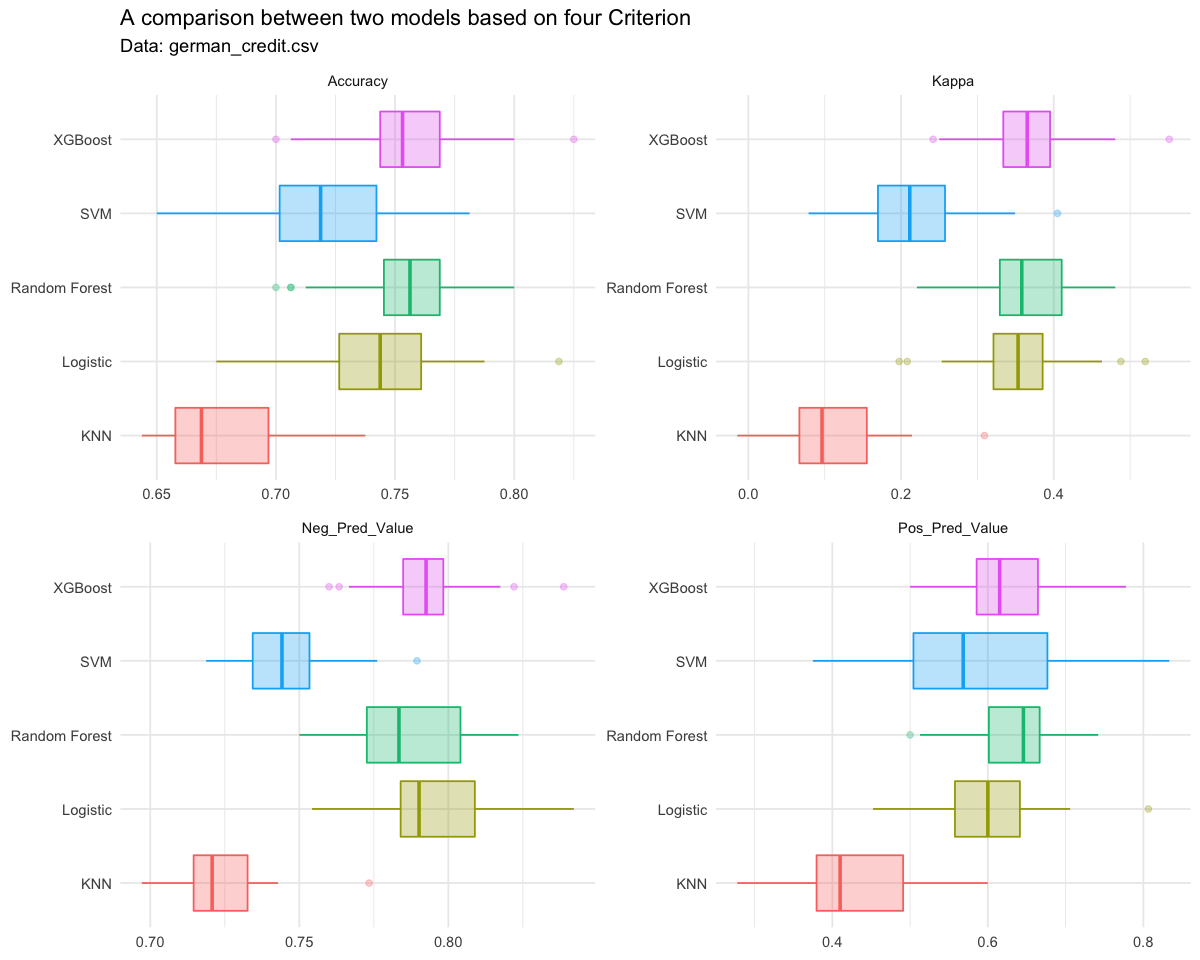

In [20]:
options(repr.plot.width = 10, repr.plot.height = 8)
my_box_plot(model1 = model_xgb_null2, model2 = model_logit_null2, model3 = model_KNN_null2, 
            model4 = model_RF_null2, model5 = model_SVM_null2) + 
  labs(subtitle = "Data: german_credit.csv")

In [21]:
library(caretEnsemble)


Attaching package: ‘caretEnsemble’

The following object is masked from ‘package:ggplot2’:

    autoplot



In [22]:
set.seed(1)
myControl <- trainControl(method="cv", number=5, summaryFunction = multiClassSummary)
model_list1 <- caretList(Class ~., data = train_data, trControl = myControl, metric = 'Accuracy', 
                         methodList = c("glm", "rf", "svmLinear", "knn", "xgbTree")
                        )

In [23]:
# gathering result
total_df <- bind_rows(model_list1$glm$resample %>% 
                        select(-Resample) %>% 
                        mutate(Model = "Logistic"), 
                      
                      model_list1$rf$resample %>% 
                        select(-Resample) %>% 
                        mutate(Model = "RF"), 
                      
                      model_list1$knn$resample %>% 
                        select(-Resample) %>% 
                        mutate(Model = "KNN"), 
                      
                      model_list1$svmLinear$resample %>% 
                        select(-Resample) %>% 
                        mutate(Model = "SVM"), 
                      
                      model_list1$xgbTree$resample %>% 
                        select(-Resample) %>% 
                        mutate(Model = "XgbTree"),
                     )

In [24]:
model_list1

$glm
Generalized Linear Model 

800 samples
 61 predictor
  2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results:

  Accuracy  Kappa      F1         Sensitivity  Specificity  Pos_Pred_Value
  0.74125   0.3442956  0.5174571  0.4625       0.8607143    0.5892711     
  Neg_Pred_Value  Precision  Recall  Detection_Rate  Balanced_Accuracy
  0.7889118       0.5892711  0.4625  0.13875         0.6616071        


$rf
Random Forest 

800 samples
 61 predictor
  2 classes: 'Bad', 'Good' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  mtry  Accuracy  Kappa       F1         Sensitivity  Specificity
   2    0.71625   0.08292286  0.1224083  0.06666667   0.9946429  
  31    0.74500   0.33617769  0.4995445  0.42500000   0.8821429  
  61    0.73625   0.32466915  0.4984686  0.43750000   0.8642857  
 

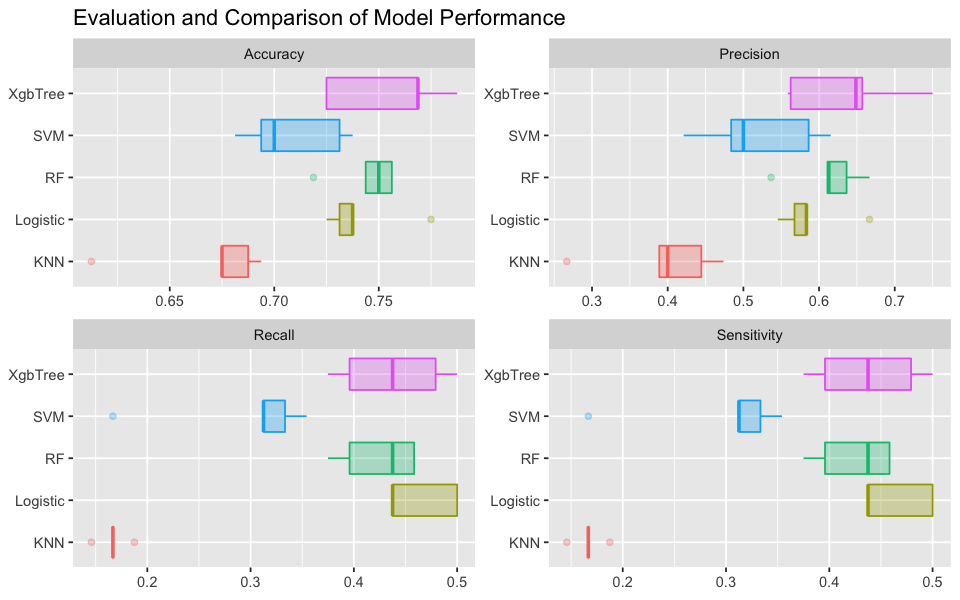

In [25]:
# Model Performance:
options(repr.plot.width = 8, repr.plot.height = 5)
total_df %>% 
  select(Accuracy, Precision, Recall, Sensitivity, Model) %>% 
  gather(a, b, -Model) %>% 
  ggplot(aes(Model, b, fill = Model, color = Model)) + 
  geom_boxplot(show.legend = FALSE, alpha = 0.3) + 
  facet_wrap(~ a, scales = "free") + 
  coord_flip() + 
  labs(x = NULL, y = NULL, 
       title = "Evaluation and Comparison of Model Performance")

In [26]:
# table
options(warn=-1)
total_df %>% 
  group_by(Model) %>% 
  summarise_each(funs(mean), Accuracy, Precision, Recall, Sensitivity) %>% 
  ungroup() %>% 
  arrange(-Accuracy) %>% 
  mutate_if(is.numeric, function(x) {round(100*x, 2)}) %>% 
  knitr::kable(caption = "Table 1: Model Performance for Validation Data Sets")



|Model    | Accuracy| Precision| Recall| Sensitivity|
|:--------|--------:|---------:|------:|-----------:|
|XgbTree  |    75.50|     63.54|  43.75|       43.75|
|RF       |    74.50|     61.27|  42.50|       42.50|
|Logistic |    74.12|     58.93|  46.25|       46.25|
|SVM      |    70.88|     52.13|  29.58|       29.58|
|KNN      |    66.88|     39.47|  16.67|       16.67|

In [27]:
options(warn=-1)
total_df %>% 
  group_by(Model) %>% 
  summarise_each(funs(mean), Accuracy, Precision, Recall, Sensitivity) %>% 
  ungroup() %>% 
  arrange(-Accuracy) %>% 
  mutate_if(is.numeric, function(x) {round(100*x, 2)}) %>% 
  write.csv(., "f1.csv")

In [28]:
#-----------------------------------------------------
#  Confusion Matrix
#-----------------------------------------------------
pred <- predict(model_list1$xgbTree, test_data %>% select(-Class))
dfCM <- data.frame(pred = pred, act = test_data$Class, id = 1:200)

In [29]:
# 
df1 <- dfCM %>% filter(pred == "Good")

# number of loan contracts: 
df1$pred %>% table()

.
 Bad Good 
   0  156 

In [30]:
# There are good cases = true positive and bad cases = false postive
df1$act %>% table()

.
 Bad Good 
  32  124 

In [31]:
head(dfCM,5)

pred,act,id
Bad,Bad,1
Bad,Bad,2
Bad,Good,3
Good,Good,4
Good,Good,5


In [32]:
#  
confusionMatrix(dfCM$pred,dfCM$act)

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad   28   16
      Good  32  124
                                          
               Accuracy : 0.76            
                 95% CI : (0.6947, 0.8174)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.03595         
                                          
                  Kappa : 0.3814          
 Mcnemar's Test P-Value : 0.03038         
                                          
            Sensitivity : 0.4667          
            Specificity : 0.8857          
         Pos Pred Value : 0.6364          
         Neg Pred Value : 0.7949          
             Prevalence : 0.3000          
         Detection Rate : 0.1400          
   Detection Prevalence : 0.2200          
      Balanced Accuracy : 0.6762          
                                          
       'Positive' Class : Bad             
                                          

In [33]:
#----------------------------------------
#       Profit Simulation
#----------------------------------------

get_result <- function(ti_le, N, model_selected, df_test_selected) {
  my_vec <- c()
  
  for (i in 1:N) {
    set.seed(i) 
    df_test <- df_test_selected %>% 
      group_by(Class) %>% 
      sample_frac(ti_le) %>% 
      ungroup()
    
    pred <- predict(model_selected, df_test %>% select(-Class))
    cm <- confusionMatrix(df_test$Class, pred)
    cm$table %>% 
      as.vector() -> u
    my_vec <- c(my_vec, u)
  }
  
  my_vec %>% 
    matrix(ncol = 4, byrow = TRUE) %>% 
    as.data.frame() %>% 
    rename(BB = V1, 
           GB = V2,
           BG = V3,
           GG = V4) %>% 
    return()
}

In [34]:
df_testa <- test_data %>% 
      group_by(Class) %>% 
      sample_frac(0.5) %>% ungroup()

In [35]:
preda <- predict(model_list1$xgbTree, df_testa %>% select(-Class))

In [36]:
cma <- confusionMatrix(df_testa$Class, preda)

In [37]:
my_veca <- c()

In [38]:
cma$table %>% 
      as.vector() -> u
    my_veca <- c(my_veca, u)

In [39]:
  my_veca %>% 
    matrix(ncol = 4, byrow = TRUE) %>% 
    as.data.frame() %>% 
    rename(BB = V1, 
           GB = V2,
           BG = V3,
           GG = V4)

BB,GB,BG,GG
12,8,18,62


In [40]:
my_veca

[1] 12  8 18 62

In [41]:
# result: 

loan_xgbtree <- get_result(0.5, 100, model_list1$xgbTree, test_data)
loan_svm <- get_result(0.5, 100, model_list1$svmLinear, test_data)
loan_rf <- get_result(0.5, 100, model_list1$rf, test_data)
loan_knn <- get_result(0.5, 100, model_list1$knn, test_data)
loan_logit <- get_result(0.5, 100, model_list1$glm, test_data)

# BB = Bad Bad = True Negatives
# GB = Good Bad = False Negatives
# BG = Bad Good = False Positive
# GG = Good Good = True Positive


In [42]:
str(loan_xgbtree)
head(loan_xgbtree,5)

'data.frame':	100 obs. of  4 variables:
 $ BB: int  16 11 14 15 16 13 13 16 15 12 ...
 $ GB: int  11 12 5 10 10 7 8 9 12 7 ...
 $ BG: int  14 19 16 15 14 17 17 14 15 18 ...
 $ GG: int  59 58 65 60 60 63 62 61 58 63 ...


BB,GB,BG,GG
16,11,14,59
11,12,19,58
14,5,16,65
15,10,15,60
16,10,14,60


In [43]:
# Calculation of Accuracy: 
total_df_result <- bind_rows(loan_xgbtree %>% mutate(Model = "XgbTree"), 
                             loan_svm %>% mutate(Model = "SVM"), 
                             loan_rf %>% mutate(Model = "RF"), 
                             loan_knn %>% mutate(Model = "KNN"), 
                             loan_logit %>% mutate(Model = "Logistic")) %>% 
  mutate(Accuracy = (BB + GG) / (BB + GG + GB + BG))

In [44]:
total_df_result %>% head(5)

BB,GB,BG,GG,Model,Accuracy
16,11,14,59,XgbTree,0.75
11,12,19,58,XgbTree,0.69
14,5,16,65,XgbTree,0.79
15,10,15,60,XgbTree,0.75
16,10,14,60,XgbTree,0.76


In [45]:
# Avg Accuracy from 100 samples: 
options(warn=-1)
total_df_result %>% 
  group_by(Model) %>% 
  summarise_each(funs(mean), Accuracy, GG, BB, BG) %>% 
  ungroup() %>% 
  arrange(-Accuracy) %>% 
  mutate_at(.vars = c("Accuracy"), function(x) {round(100*x, 2)}) %>% 
  knitr::kable(caption = "Table 2: Model Performance for Test Data Sets")



|Model    | Accuracy|    GG|    BB|    BG|
|:--------|--------:|-----:|-----:|-----:|
|Logistic |    76.59| 60.36| 16.23| 13.77|
|XgbTree  |    76.10| 61.83| 14.27| 15.73|
|RF       |    75.54| 60.89| 14.65| 15.35|
|SVM      |    74.35| 66.37|  7.98| 22.02|
|KNN      |    69.23| 63.64|  5.59| 24.41|

In [46]:
# Profit simulation function: 
profit_simu <- function(df_result, rate, N) {
  data("GermanCredit")
  no_loan <- german$Amount
  good_debt <- sum(df_result$GG)
  bad_debt <- sum(df_result$BG)
  
  my_prof <- c()
  
  for (i in 1:N) {
    set.seed(i)
    prof <- rate*sample(no_loan, size = good_debt, replace = TRUE) %>% sum() 
              - sum(sample(no_loan, size = bad_debt, replace = TRUE))
    my_prof <- c(prof, my_prof)
  }
  return(my_prof)
}

In [47]:
data("GermanCredit")
length(GermanCredit$Amount)
sum(loan_xgbtree$GG)

[1] 1000

[1] 6183

In [48]:
loan_xgbtree$GG

[1] 59 58 65 60 60 63 62 61 58 63 64 62 63 62 61 67 62 60 62 61 64 63 61 59 64
 [26] 63 65 64 62 61 61 58 63 61 62 60 59 63 61 62 63 58 61 62 61 62 64 64 60 58
 [51] 62 63 63 61 63 62 58 62 63 58 64 65 64 65 61 65 61 62 64 63 60 60 65 65 61
 [76] 61 60 59 64 61 59 63 60 60 61 65 62 62 63 60 64 62 61 61 61 64 61 60 64 63

In [49]:
# Profit Calculation from 1000 simulation times

profit <- c(loan_xgbtree %>% profit_simu(0.3, 1000), 
            loan_svm %>% profit_simu(0.3, 1000), 
            loan_rf %>% profit_simu(0.3, 1000), 
            loan_knn %>% profit_simu(0.3, 1000), 
            loan_logit %>% profit_simu(0.3, 1000))

profit_df <- data.frame(Profit = profit, 
                        Model = c(rep("XgbTree", 1000), 
                                  rep("SVM", 1000), 
                                  rep("RF", 1000), 
                                  rep("KNN", 1000), 
                                  rep("Logistic", 1000)
                                 )
                       )

In [50]:
head(profit_df,5)

Profit,Model
6072775,XgbTree
6086358,XgbTree
6037586,XgbTree
6102285,XgbTree
6065468,XgbTree


In [51]:
options(warn=-1)
profit_df %>% 
  group_by(Model) %>% 
  summarise_each(funs(mean, median, min, max, sd), Profit) %>% 
  ungroup() %>% 
  arrange(-mean) %>% 
  mutate_if(is.numeric, function(x) {round(x, 0)}) %>% 
  knitr::kable(caption = "Table 3: Simulated Profit Based Monte Carlo Method
                            \nwith Interest Rate is 30% for Test Data Sets", 
               col.names = c("Model", "Mean", "Median", "Min", "Max", "SD"))




|Model    |    Mean|  Median|     Min|     Max|    SD|
|:--------|-------:|-------:|-------:|-------:|-----:|
|SVM      | 6513828| 6514225| 6286726| 6716445| 68135|
|KNN      | 6246711| 6246003| 6027972| 6440565| 66505|
|XgbTree  | 6069174| 6068885| 5874187| 6259595| 65746|
|RF       | 5977191| 5975220| 5777978| 6152383| 65228|
|Logistic | 5925101| 5922345| 5721494| 6105366| 65128|

In [52]:
options(warn=-1)
profit_df %>% 
  group_by(Model) %>% 
  summarise_each(funs(mean, median, min, max, sd), Profit) %>% 
  ungroup() %>% 
  arrange(-mean) %>% 
  mutate_if(is.numeric, function(x) {round(x, 0)}) %>% write.csv(., "f2.csv")

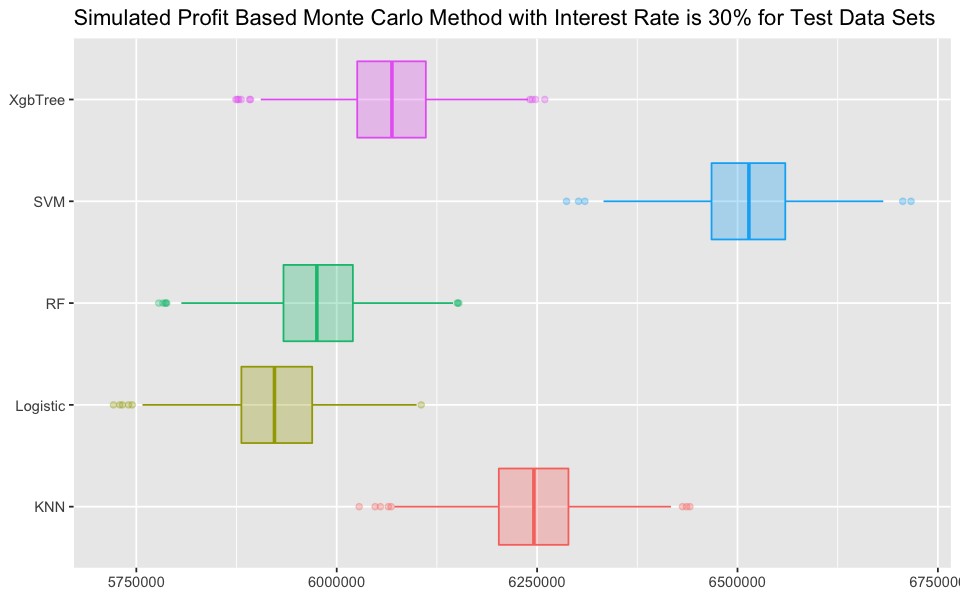

In [53]:
options(repr.plot.width = 8, repr.plot.height = 5)
profit_df %>% 
  ggplot(aes(Model, Profit, fill = Model, color = Model)) +
  geom_boxplot(alpha = 0.3, show.legend = FALSE) + 
  coord_flip() + 
  labs(x = NULL, y = NULL, 
       title = "Simulated Profit Based Monte Carlo Method with Interest Rate is 30% for Test Data Sets")